In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [21]:
import numpy as np

# Define the target function: Euclidean distance
def error(x, x_n):
    return 1/2*(x - x_n)**2

# Define the gradient of the target function
def error_gradient(x, x_n):
    return 2*(x - x_n)

In [22]:
# Newton's method for minimizing the Euclidean distance
def newtons_method(x_0, x_n, tolerance=1e-6, max_iterations=100, alpha=1e-1):
    x = x_0
    x_iter = [x_0]
    iteration = 0

    while np.sum(error(x, x_n)) > tolerance and iteration < max_iterations:
        x = x - alpha*error_gradient(x, x_n)
        x_iter.append(x)
        iteration += 1

    if iteration == max_iterations:
        print("Newton's method did not converge.")
    else:
        print(f"Minimum Euclidean distance: {np.linalg.norm(x - x_n)}")
        print(f"Optimal x: {x}")

    return x_iter

# Initial guess for x_0
x_0 = np.array([0.0, 0.0, 0.0, 0.0])

# Desired point x_n
x_n = np.array([1.0, 2.0, 3.0, 4.0])

# Call Newton's method
_ = newtons_method(x_0, x_n)


Minimum Euclidean distance: 0.0011375752458733645
Optimal x: [0.99979231 1.99958462 2.99937692 3.99916923]


In [23]:
# Define the fixed-point iteration function
def fixed_point_iteration(x_0, x_n, tolerance=1e-6, max_iterations=100, alpha = 1e-1):
    x = x_0
    iteration = 0
    x_iter = [x_0]

    while np.linalg.norm(x - x_n) > tolerance and iteration < max_iterations:
        # Update x using the Euclidean distance
        x = x - alpha * (x - x_n)  # Adjust the step size (0.5 in this example)
        x_iter.append(x)

        iteration += 1

    if iteration == max_iterations:
        print("Fixed-point iteration did not converge.")
    else:
        print(f"Minimum Euclidean distance: {np.linalg.norm(x - x_n)}")
        print(f"Optimal x: {x}")
    
    return x_iter

# Initial guess for x_0
x_0 = np.array([0.0, 0.0, 0.0, 0.0])

# Desired point x_n
x_n = np.array([1.0, 2.0, 3.0, 4.0])

# Call the fixed-point iteration function
_ = fixed_point_iteration(x_0, x_n)

Fixed-point iteration did not converge.


In [24]:
def read_and_add_to_dataset(img_path):
    target_width = 400  # Adjust these values as needed
    target_height = 600

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
            
    if img is not None:
        img = cv2.resize(img, (target_width, target_height))

    return img

In [32]:
img = read_and_add_to_dataset("/home/coberndorm/Documents/Semestre_IX/Linear_Algebra_In_Data_Science/Taller_1/Punto_4/foto.jpeg")
img = img.reshape(-1)

x_0 = np.random.random(img.shape)

x_iter = fixed_point_iteration(x_0, img, tolerance=2, max_iterations=1000, alpha=0.001)

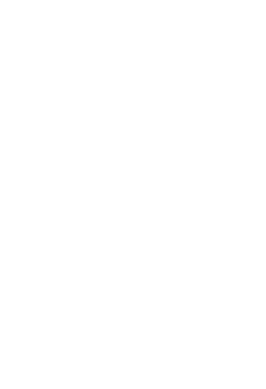

In [31]:
fig, ax = plt.subplots()
artists = []

counter = 0
for x in x_iter:
    ax.set_axis_off()
    img = ax.imshow(x.reshape((600,400)), cmap = 'gray', vmin = 0, vmax = 255)
   
    artists.append([img])

ani = animation.ArtistAnimation(fig = fig, artists = artists, interval = 200)
HTML(ani.to_html5_video())